# Neither Black-Scholes  nor local volatility?

We offer you the following practical task on Black-Scholes and local volatility model. 

Total score is **101**, which will be converted to $21\%$ of the course grade. You have $1$ month for this work. **Deadline is 13th of November, 23:59 MSK**.

The file must be sent to **stoch-vol-22-fall@yandex.ru** with topic "stoch-vol Lab1".  Please rename your file as **"SurnameName_Lab1.ipynb"** before sending. 

If you have any questions feel free to ask in Telegram https://t.me/v_antipov or https://t.me/igortao.

**Full name:**

**Faculty:**

## Episode 0: Import all python modules you wish 💅 (1 point)

In [1]:
### YOUR IMPORTS HERE

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from tqdm import tqdm
import volatility as vol
import scipy.stats as st
from collections.abc import Callable
from tqdm.auto import trange

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


---

## Episode 1: Around Black-Scholes model 🧠 (50 points)

**1**. 💅 <span style="color:blue">(5 points)</span>  Plot **put** option prices as functions of the underlying asset price for different **exercise times** and different **volatilities**. Use parameters 

$$K = 1, \quad r = 0, \quad S \in [0.5, 1.5],$$

and $T \in \{0,\ \frac{1}{4},\ \frac{1}{2},\ \frac{3}{4},\ 1\}$ (time is measured in years) and $\sigma \in \{0.1, \ 0.2, \ 0.3\}$.

*Note: the answer should contain three plots (for each volatility $\sigma$), each of which shows option prices for different excercise times $T$.*

In [2]:
### YOUR CODE HERE

---

**2**. 💅 <span style="color:blue">(5 points)</span>  What kind of dependence on the parameters of put option price do you observe? How does the price of a put option change with changes in volatility, time to expiration? Why? Provide the intuition. 

YOUR ANSWER HERE

---

**3**. 💅 <span style="color:blue">(10 points)</span> Show theta-gamma relationship in Black-Scholes model for put option. Assume that interest rate $r=0$ and show that 

$$\dfrac{\partial P}{\partial t} + \dfrac{S^2 \sigma^2}{2} \dfrac{\partial^2 P}{\partial S^2} = 0.$$

*Note: Calculate $\dfrac{\partial P}{\partial t}$ and $\dfrac{\partial^2 P}{\partial S^2}$ as functions of $S$. Using $K = 1, \sigma = 0.2, T = 1$ and $S \in [ 0.5, 1.5 ]$*, show the equality above by plotting the corresponding terms of the equation. 

In [3]:
### YOUR CODE HERE

---

**4**. 💅 <span style="color:blue">(10 points)</span> Replicate considered put option using the portfolio rebalanced $n$ times (i.e. every $dt = T/n$ units of time). Using simulations, estimate the distribution of the replication error.


    1) Generate m random trajectories of price process trajectories on the segment [0,t] with a step dt = T/n.

    2) For each trajectory at each moment of time, find a replicating portfolio. Assume that the initial value of the portfolio is equal to the option price.

    3) For each trajectory, calculate the difference between the value of the replicating portfolio at time T and the payout to be made on the option.

    4) Display the distribution of the obtained differences in the form of a histogram.

*Note: use $m = 2^{10} - 1$ and $n$ = 123*. 

In [4]:
### YOUR CODE HERE

---

**5**. 🧠 <span style="color:blue">(10 points)</span> Let $C_{call} (S_t, r, \sigma, t) := C(t, S_t)$ be a call option price where $C(t, S)$ satisfies BS equation. Suppose that we sell a call option at $t=0$ at implied volatility $\hat \sigma$, i.e. we get the premium $C_{call}(S_0, r, \hat \sigma, 0)$. Hence the hedging strategy is such that the number of the risky asset held at time $t$ is $$H_t = \dfrac{\partial C}{\partial S}.$$ Moreover, suppose that the true dynamics of asset price is **not** geometric Brownian motion $dS_t = r S_t dt + \sigma S_t dW_t$, but is given by more general Ito process

$$dS_t = \alpha_t S_t dt + \beta_t S_t dW_t. $$  

5.1 <span style="color:blue">(1 point out of 10)</span> Using strategy $H_t$, write SDE for the value $X_t$ of hedging portfolio, assuming that we hold $\dfrac{\partial C}{\partial S}$ units of risky asset and $X_t - \dfrac{\partial C}{\partial S} S_t$ money in riskless one.

YOUR ANSWER

5.2 <span style="color:blue">(1 point out of 10)</span> Assume that $Y_t = C(t, S_t)$. Applying Ito formula to $Y_t$, write SDE for $Y_t$.  

YOUR ANSWER

5.3 <span style="color:blue">(3 points out of 10)</span> Using answers from 5.1 and 5.2 and BS equation, show that hedging error $Z_t = X_t - Y_t$ satisfies

$$\dfrac{d}{dt} Z_t = r Z_t + \dfrac{1}{2} S_t^2 \dfrac{\partial^2 C}{\partial S^2} \left( \hat \sigma^2 - \beta^2_t \right).$$

YOUR ANSWER

5.4 <span style="color:blue">(3 points out of 10)</span> Solve the equation for $Z_t$ above and show that 

$$Z_T = \int_{0}^{T} e^{r(T-s)} \dfrac{1}{2} S_t^2 \dfrac{\partial^2 C}{\partial S^2} \left( \hat \sigma^2 - \beta_t^2 \right) dt. $$

YOUR ANSWER

5.5 <span style="color:blue">(2 points out of 10)</span> Looking at the results above, is it possible to make a **profit with probability one** even though the true price model is substantially different from the assumed model (GBM)? What condition is sufficient for getting this profit? 

YOUR ANSWER

---

---

## Episode 2: Local volatility from Monte Carlo perspective (50 points)

It is known, that the local volatility model has wrong implied volatility dynamics (inconsistent with the market). Approximating market with local volatility (LV) model leads to incorrect hedge. Your goal is to demonstrate the incorrectness of hedge in LV model.

**1.** 💅 <span style="color:blue">(0 points)</span> **Market dynamics**

We assume that the market is driven by the SABR model (will be later in the course). The function to simulate paths of this model is given below, you can use it. You are free to tweak hyper parameters too.

In [5]:
ALPHA = 0.15
BETA = 0.2
RHO = -0.3
NU = 0.3

In [6]:
def make_pseudo_market_simulator(
    nsteps: int,
    alpha: float,
    beta: float,
    rho: float,
    nu: float,
    t_stop: float = 1.0,
) -> Callable[[int], npt.NDArray[np.float_]]:
    """
    Functions that makes proper simulator for Monte-Carlo. Paths from this
    simulator are assumed to represent the true market dynamics.
    
    Args:
        nsteps (int): number of steps in the discretization.
        alpha (float): model parameter, alpha > 0.
        beta (float): model parameter, 0 < beta < 1.
        rho (float): model parameter, -1 <= rho <= 1.
        nu (float): model parameter, nu > 0.
        t_stop (float): time horizon for trajectories.
    Returns:
        Callable(int) -> np.NDArray, proper simulator for MC
    """

    s = 1.0
    
    def simulate(npaths: int):
        dt = t_stop / nsteps
        sqrtdt = np.sqrt(dt)
        Z = st.norm.rvs(size=(2, nsteps, npaths))
        Alpha = alpha*np.exp(np.concatenate([
            np.zeros(shape=(1, npaths)),
            np.cumsum(Z[0]*nu*sqrtdt - 0.5*nu**2*dt, axis=0)]))

        if beta == 0:
            S = np.cumsum(np.concatenate([
                np.ones(shape=(1, npaths))*s,
                Alpha[:-1] *
                (rho*Z[0] + np.sqrt(1-rho**2)*Z[1])*sqrtdt]), axis=0)
        elif beta < 1:
            S = np.empty_like(Alpha)
            S[0] = s
            for i in range(nsteps):
                S[i+1] = np.maximum(
                    0,
                    S[i] + Alpha[i]*S[i]**beta *
                    (rho*Z[0, i] + np.sqrt(1-rho**2)*Z[1, i])*sqrtdt)
        elif beta == 1:
            X = np.cumsum(np.concatenate([
                np.zeros(shape=(1, npaths)),
                -0.5*Alpha[:-1]**2*dt + Alpha[:-1] *
                (rho*Z[0] + np.sqrt(1-rho**2)*Z[1])*sqrtdt]), axis=0)
            S = s*np.exp(X)
        else:
            X = np.empty_like(Alpha)
            X[0] = np.log(s)
            for i in range(nsteps):
                X[i+1] = X[i] - (
                    0.5*Alpha[i]**2*np.exp(2*(beta-1)*X[i])*dt +
                    Alpha[i]*np.exp((beta-1)*X[i]) *
                    (rho*Z[0, i] + np.sqrt(1-rho**2)*Z[1, i])*sqrtdt)
            S = np.exp(X)
        return S
        
    return simulate

In [7]:
# EXAMPLE OF SIMULATION
np.random.seed(42)
simulator = make_pseudo_market_simulator(nsteps=100, alpha=ALPHA, beta=BETA, rho=RHO, nu=NU)
simulated_paths = simulator(npaths=10000)

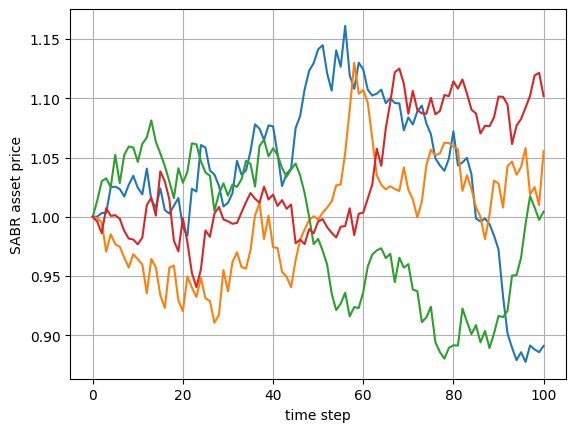

In [8]:
# TRAJECTORIES PLOT
plt.plot(simulated_paths[:, 0])
plt.plot(simulated_paths[:, 1])
plt.plot(simulated_paths[:, 2])
plt.plot(simulated_paths[:, 3])

plt.ylabel('SABR asset price')
plt.xlabel('time step')

plt.grid()
plt.show()

We assume that $S_0 = 1$ and consider one European call ATM option with strike $K=1$ and time to expiration $T = 1$ year.

In [9]:
OPT_STRIKE = 1.0
OPT_EXPIRATION = 1.0

---

**2.** 🧠 <span style="color:blue">(5 points)</span> **Pricing**

Using market dynamics simulator and MC simulator from `volatility` module, calculate the market price of call option and its market implied volatility.  

In [10]:
# YOUR CODE

# opt_market_price = vol.mc.monte_carlo(simulator = ...,)

# opt_market_iv = vol.blackscholes.call_iv(...)

**3.** 🧠 <span style="color:blue">(5 points)</span> **Setting up the LV model**

Define a grid of options, calc their market price using MC with given simlator and fit the leverage function using Dupire's formula.
Be shure that the strikes range is wide enough to cover a large share of possible final stock prices.
The result shoud be a function of time and stock price that calculates the value of the leverage function.

In [11]:
# YOUR CODE

**4.** 🧠 <span style="color:blue">(10 points)</span> **MC in the LV model**

Write a function, that makes a proper simulator for the LV model.
It shoud take 3 parameters: initial stock price, starting time and leverage function.
The simulator then samples trajectories from time `t0` assuming that initial stock price is `s0`.

In [12]:
def make_lv_simulator(
    s0: float,
    t0: float,
    sigma_lv: Callable[[float, float], float]
) -> Callable[[int], npt.NDArray[np.float_]]:
    """
    Makes MC simulator for LV model.
    
    The function uses Euler discretization scheme to simulate the SDE for the
    logarithm of stock price.
    
    Args:
        s0 (float): initial stock price.
        t0 (float): starting time.
        sigma_lv (Callable[[float, float], float]): function of current time
            (absolute time, not time to expiration) and current stock price
            that returns the value of leverage function at that point.
    Returns:
        simulator (Callable[[int], npt.NDArray[np.float_]]): proper MC
            simulator that samples trajectories from defined LV model.
    """
    
    # MAY BE SOME CODE HERE
    
    def simulate(npaths: int):
        
        # YOUR CODE HERE
        
        raise NotImplementedError  # placeholder, remove
        
    # MAY BE SOME CODE HERE
        
    return simulate

Let's sell our option and hedge it in the LV model.
Our goal is to collect a sample of total P&Ls of such an operation.
Total P&L consists of 3 components:
1. Initial option price. We assume that we sell the option for its market price.
1. Hedging P&L.
At each time step we calculate option's delta and buy the proper amount of underlying. 
Hold this amount for one step and then repeat the procedure until expiration.
1. At expiration we pay option's payoff.

We assume that we don't know the market price of our option at any other time points except for the initial.
So, we need to use our model to get an option price and it's delta. 
How will we do it?
Let 
$$C_{LV}(T, K \mid t_0 = t, s_0 = s)$$
be the function, 
that values the option with expiration time $T$, strike $K$ using the fitted LV model and assuming that
we are pricing this option at time $t_0$ and the underlying price is $s_0$ at the time of pricing.
We can define the corresponding implied volatility function $\hat \sigma_{LV}(T, K \mid t_0 = t, s_0 = s)$ such that
$$C_{LV}(T, K \mid t_0 = t, s_0 = s) = C_{BS}\bigl(T, K \bigm| t_0 = t, s_0 = s, \hat \sigma = \hat \sigma_{LV}(T, K \mid t_0 = t, s_0 = s)\bigr).$$
So, if we substitute our IV function in the Black-Scholes formula, 
we obtain option price consistent with our LV model.

The formula for option's delta will be:
$$
\Delta_{LV}(T, K \mid t_0 = t, s_0 = s)
= \frac{\partial}{\partial s} C_{LV}(T, K \mid t_0 = t, s_0 = s) =\\
= \Delta_{BS}\bigl(T, K \bigm| t_0 = t, s_0 = s, \hat \sigma = \hat \sigma_{LV}(T, K \mid t_0 = t, s_0 = s)\bigr) +\\
+ \mathcal{V}_{BS}\bigl(T, K \bigm| t_0 = t, s_0 = s, \hat \sigma = \hat \sigma_{LV}(T, K \mid t_0 = t, s_0 = s)\bigr)
\cdot \frac{\partial}{\partial s} \hat \sigma_{LV}(T, K \mid t_0 = t, s_0 = s) =\\
= \Delta_{BS} + \underline{\mathcal{V}_{BS} \frac{\partial}{\partial s} \hat \sigma_{LV}}.
$$

The first term is classical BS delta. The second term is called **shadow delta**. To calculate the whole delta you need 2 functions: LV implied volatility function and it's derivative wrt stock price.
The problem in the LV model is that the $\frac{\partial}{\partial s} \hat \sigma_{LV}$ has the opposite sign to the behavior usually seen in real markets.
So if we just don't account the seccond term in our delta calculation, we shoud obtain a better hedge (but mathematically inconsistent with the LV model).

**5.** 🧠 <span style="color:blue">(10 points)</span> **LV IV**

Here you should construct the IV function $\hat \sigma (\cdot, \cdot)$.
To do it:
1. define the grid of initial conditions (time and stock price);
2. apply MC from each pair of stock price and time to price our option (be carefull, the time to expiration will be `OPT_EXPIRATION - t` instead of `t`);
3. calculate the implied volatilities for each set of initial conditions (it may fail at some points, it's OK, just filter that points out);
4. fit `SmoothBivariateSpline` to optain the desired function and use `SmoothBivariateSpline.partial_derivative` to get the IV's derivative.

In [13]:
# YOUR CODE

**6.** 🧠 <span style="color:blue">(10 points)</span> **Backtesting option hedging**

Now your goal is to define a function, that performs a backtest.
The function must take the LV IV functoin and optionally it's derivative.
If the derivative is given, the function shoud calc the full derivative,
if not, it shoud calc only the BS delta with LV IV substituted in it.

Backtest works as follows.
It samples some paths using **market** sampler.
Then at each time step in a loop it calculates delta and calculates P&L for the next day.
So, the formula for the total P&L reads:
$$P\&L = C_{mkt} + \sum_{t=0}^{T-1} \Delta_t(S_{t+1} - S_t) - \max(0, S_T - K)$$

In [14]:
# YOUR CODE

**7.** 🧠 <span style="color:blue">(10 points)</span> **Comparison**

Generate to samples: with the shadow delta and without it.
What is the theoretical **expected value** of the total P&L in both ways?
Justify your answer.
Apply to the samples proper statistical tests that show it.
What does it mean that one way of hedging is more accurate than other?
How can we statistically prove (mention proper test) that hedging with full delta is less accurate
than heding with only the first term?
Show it on the data.

**Note:** To eliminate impact of randomness on comparison, fix random seed or compare on the same set of paths.

YOUR ANSWERS

In [15]:
# YOUR CODE